In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


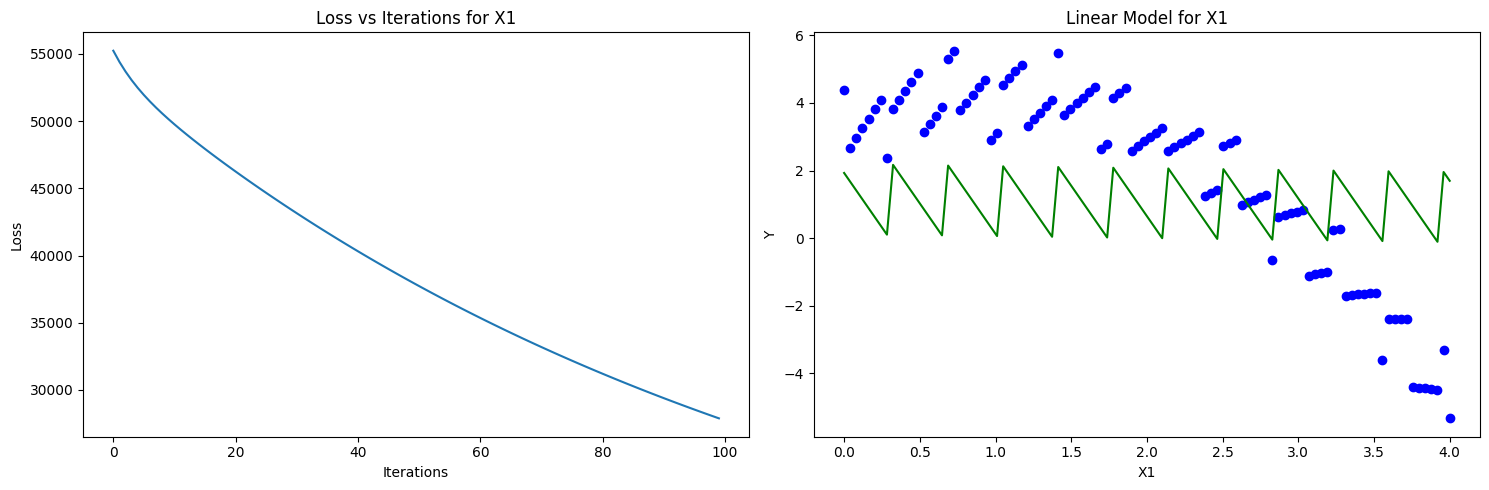

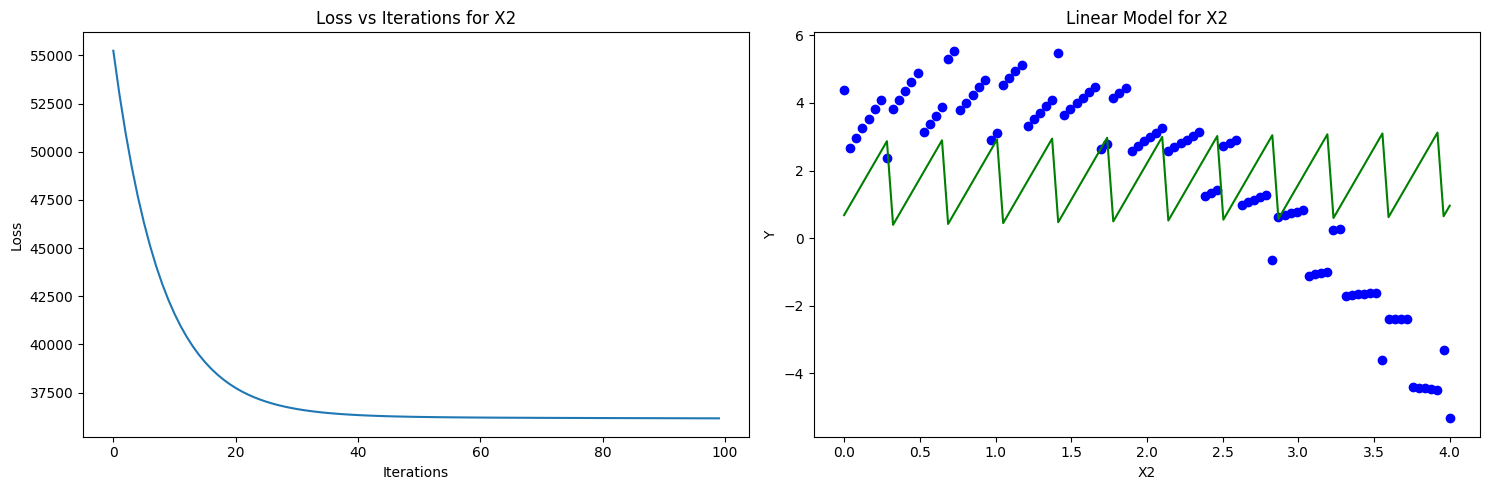

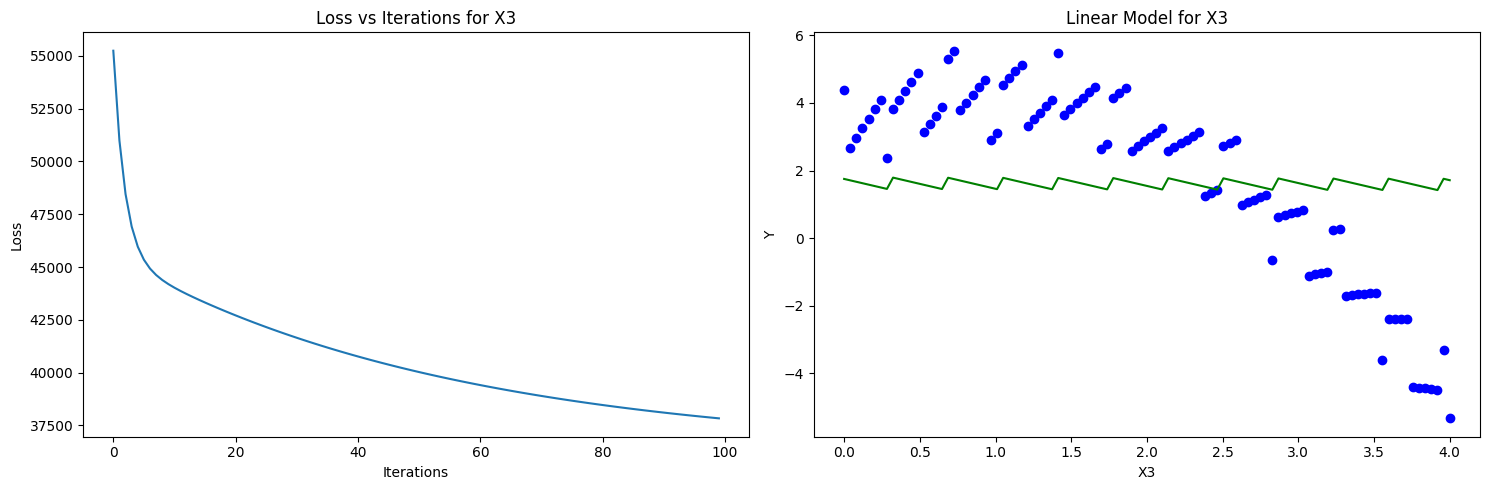

Linear model for X1: Y = -0.5813 * X1 + 2.1843
Linear model for X2: Y = 0.6968 * X2 + 0.3745
Linear model for X3: Y = -0.0940 * X3 + 1.7932
The explanatory variable with the lowest loss is: X1


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/D3.csv'
D3 = pd.DataFrame(pd.read_csv(file_path))
X = D3.values[:, 0:3]
Y = D3.values[:, 3]

lRates = [0.02, 0.01, 0.04]
numIterations = 100

def gradient_descent(X, Y, theta, lRate, numIterations):
  m = len(Y)
  theta = np.zeros(X.shape[1])
  output = []

  for _ in range(numIterations):
        pred = np.dot(X, theta)
        error = pred - Y
        theta = theta - (1/m) * lRate * np.dot(X.T, error)
        loss = (1/2*m) * np.sum(error**2)
        output.append(loss)

  return theta, output

results = []

for i in range(3):
    lRate = lRates[i]
    featureX = X[:, i]
    featureX = np.column_stack((np.ones(len(featureX)), featureX))
    thetaX = np.zeros((2, 1))
    thetaX, OutputX = gradient_descent(featureX, Y, thetaX, lRate, numIterations)
    results.append((thetaX, OutputX))

varX = ['X1', 'X2', 'X3']

for i in range(3):
    thetaX, OutputX = results[i]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(numIterations), OutputX)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Iterations for {varX[i]}')

    plt.subplot(1, 2, 2)
    plt.scatter(X[:, -1+1], Y, color='blue')
    plt.plot(X[:, -1+1], np.dot(featureX, thetaX), color='green')
    plt.xlabel(varX[i])
    plt.ylabel('Y')
    plt.title(f'Linear Model for {varX[i]}')

    plt.tight_layout()
    plt.show()

for i in range(3):
    thetaX, _ = results[i]
    print(f'Linear model for {varX[i]}: Y = {thetaX[1]:.4f} * {varX[i]} + {thetaX[0]:.4f}')

min_loss_index = np.argmin([loss[-1] for (_, loss) in results])
print(f'The explanatory variable with the lowest loss is: {varX[min_loss_index]}')

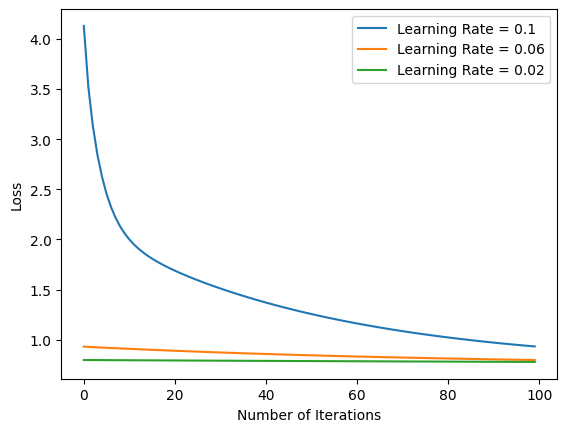

Best Theta: [ 4.45716466 -1.88265348  0.6741777  -0.13998271]
Predictions for (X1, X2, X3) values:
(1, 1, 1) -> 5.609438313110464
(2, 0, 4) -> 3.054269024851124
(3, 2, 1) -> 2.9590930213023006


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/DataSets/D3.csv'
D3 = pd.DataFrame(pd.read_csv(file_path))
X = D3.values[:, :3]
Y = D3.values[:, 3]

X = np.column_stack((np.ones(len(X)), X))

def compute_loss(X, Y, theta):
    m = len(Y)
    pred = X.dot(theta)
    error = pred - Y
    loss = (1 / (2 * m)) * np.sum(error ** 2)
    return loss

def gradient_descent(X, Y, theta, alpha, numIterations):
    m = len(Y)
    loss_history = []

    for _ in range(numIterations):
        pred = X.dot(theta)
        error = pred - Y
        gradient = (1 / m) * X.T.dot(error)
        theta -= alpha * gradient
        loss = compute_loss(X, Y, theta)
        loss_history.append(loss)

    return theta, loss_history

lRates = [0.1, 0.06, 0.02]
numIterations = 100
initialTheta = np.zeros(X.shape[1])

best_theta = None
best_cost = float('inf')

for lRate in lRates:
    theta, loss_history = gradient_descent(X, Y, initialTheta, lRate, numIterations)

    if loss_history[-1] < best_cost:
        best_cost = loss_history[-1]
        best_theta = theta

    plt.plot(range(numIterations), loss_history, label=f'Learning Rate = {lRate}')

plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Best Theta:", best_theta)

newX = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
newXs = (newX - mean) / std
newXs = np.column_stack((np.ones(len(newXs)), newXs))
pred = newXs.dot(best_theta)

print("Predictions for (X1, X2, X3) values:")
for i, pred in enumerate(pred):
    print(f"({newX[i, 0]}, {newX[i, 1]}, {newX[i, 2]}) -> {pred}")